### MLPregressor Tutorials 

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df =pd.read_csv("dm_office_sales.csv - dm_office_sales.csv.csv")
df

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802
...,...,...,...,...,...,...
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354


In [152]:
x=df.iloc[:,:-1]#in x we have stored input features
y=df.iloc[:,-1] #in y we have stored target feature

In [153]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=402)

In [154]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
encoder = OneHotEncoder(sparse_output=False,drop='first')
scaler=StandardScaler()

In [155]:
X_train


,division,level of education,training level,work experience,salary
726,office supplies,bachelor's degree,2,7,97227
397,printers,associate's degree,1,3,74037
128,computer software,associate's degree,1,10,115164
207,office supplies,some college,2,4,81063
741,office supplies,associate's degree,2,9,111905
...,...,...,...,...,...
990,printers,some college,0,3,68353
202,printers,associate's degree,2,10,122390
326,office supplies,some college,1,4,77702
6,peripherals,associate's degree,0,5,77548


In [156]:
encoder.fit(X_train[['division','level of education']]) #fitting ohe for columns of x_Train

OneHotEncoder(drop='first', sparse_output=False)

In [157]:
#fitting scaler for numeric columns in xtrain
scaler.fit(X_train[['training level','work experience','salary']])

StandardScaler()

In [158]:
encoded_data_ohe = encoder.transform(X_train[['division','level of education']])

In [159]:
encoded_data_ohe.shape

(700, 8)

In [160]:
X_train_numeric_scaled = scaler.transform(X_train[['training level','work experience','salary']])

In [161]:
X_train_transformed = np.hstack([encoded_data_ohe,X_train_numeric_scaled])

In [162]:
X_test_ohe = encoder.transform(X_test[['division','level of education']])

In [163]:
X_test_numeric_Scaled = scaler.transform(X_test[['training level','work experience','salary']])

In [164]:
X_test_transformed = np.hstack([X_test_ohe,X_test_numeric_Scaled])

In [165]:
scaler1 = StandardScaler()

In [166]:
y_train = y_train.values.reshape(-1,1)
scaler1.fit(y_train)

StandardScaler()

In [167]:
y_train_scaled = scaler1.transform(y_train)

In [168]:
y_test = y_test.values.reshape(-1,1)
scaler1.fit(y_test)

StandardScaler()

In [169]:
y_test_transformed = scaler1.transform(y_test)

In [170]:
#Now importing MLPRegressor , Always make sure whenever we make scaler object of x_Train or x_test so it expect same columns given ,
# scaler object for y_train  we need to create new scaler object
from sklearn.neural_network import MLPRegressor

In [171]:
model  =MLPRegressor(
    hidden_layer_sizes=(10,10),
    activation='relu',
    solver='adam',
    random_state=45,
    max_iter=1000,
    learning_rate_init=0.0001,
    batch_size=8,
    early_stopping=True
)

In [172]:
model.fit(X_train_transformed,y_train_scaled)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(batch_size=8, early_stopping=True, hidden_layer_sizes=(10, 10),
             learning_rate_init=0.0001, max_iter=1000, random_state=45)

In [173]:
y_pred = model.predict(X_test_transformed)

In [174]:
y_pred

array([-2.02896652e-01,  7.52333492e-02, -1.16590078e+00, -1.93425016e-02,
       -7.48047933e-01,  2.64400028e-01,  8.03377354e-01,  9.78951391e-01,
        1.38555086e+00, -9.68140105e-01,  2.16643058e+00, -3.39077034e-01,
        3.10008690e-01, -1.23535718e+00,  5.92397936e-02,  9.59474730e-01,
       -1.08108390e+00,  8.87377772e-02,  1.48026557e-01, -6.06942756e-01,
        1.15420847e+00,  1.13425276e+00, -1.32632217e+00, -6.56702443e-01,
        2.17644155e-01, -6.31600322e-02,  3.62401117e-01, -9.97281906e-01,
       -1.65782780e+00, -1.41677604e+00, -1.61466733e+00,  4.51951557e-02,
       -7.09021785e-01,  4.36011751e-01,  1.17064849e+00,  1.33920478e+00,
       -4.55883137e-01,  1.22561434e-01,  8.28184754e-01, -7.17882898e-01,
       -6.00174833e-02, -1.56471984e+00, -9.42909867e-01,  4.20287793e-01,
        1.49365668e-01,  2.06025705e+00,  2.66211346e-01,  8.24672217e-02,
       -1.18855070e-01,  1.12525059e+00, -8.16436023e-01,  2.50327503e-01,
        2.83648321e-01, -

In [175]:
#Plotting the values finally
import seaborn as sns

In [176]:
#Importing metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error,root_mean_squared_error,r2_score,make_scorer

In [177]:
mae = mean_absolute_error(y_test_transformed,y_pred)
mae

np.float64(0.21138120581445005)

In [178]:
mse =mean_squared_error(y_test_transformed,y_pred)
mse

np.float64(0.07533222437677664)

In [179]:
rmse =root_mean_squared_error(y_test_transformed,y_pred)
rmse

np.float64(0.27446716447833364)

In [180]:
r2 =r2_score(y_test_transformed,y_pred)
r2

0.9246677756232233

(300, 1)

In [183]:
y_pred.shape

(300,)

C:\Users\student\AppData\Local\Temp\ipykernel_13964\3697316218.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test_transformed.flatten(),y=y_pred,palette='deep')


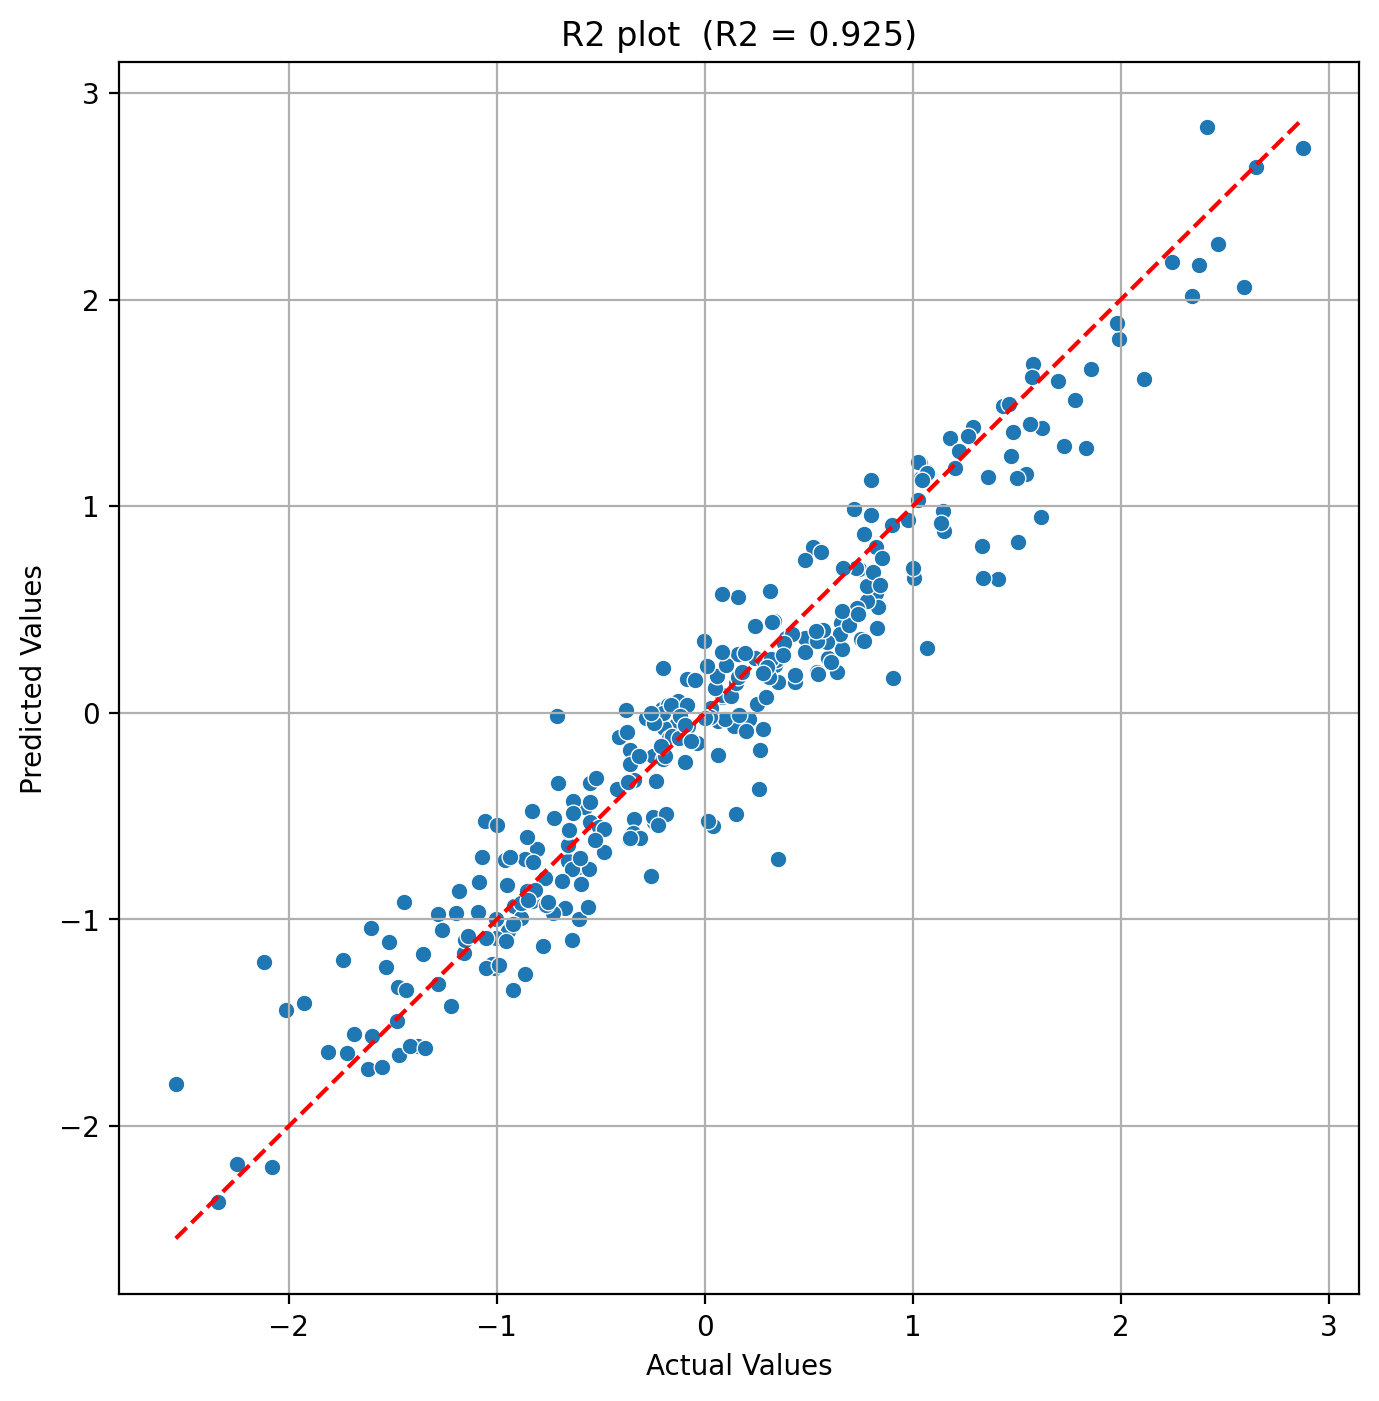

In [187]:
plt.figure(figsize=(8,8),dpi=200)
sns.scatterplot(x=y_test_transformed.flatten(),y=y_pred,palette='deep')
sns.lineplot(x=y_test_transformed.flatten(),y=y_test_transformed.flatten(),color='red',ls='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"R2 plot  (R2 = {r2 :0.3f})")
plt.grid(True)